In [1]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup  Pytrend Library and Define Keyword

In [7]:
pytrends = TrendReq(hl = 'en-US' , tz = 360)
keyword = "cloud computing"

## In the code if i want to search another keyword then i just have to change it in the above code 

#  #Data Request

In [14]:
pytrends.build_payload([keyword], cat = 0 , timeframe = 'today 12-m' , geo = '' ,gprop = '' )

# Country-wise Interest of the keyword searched

In [26]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by= keyword, ascending = False).head(15)

C:\Users\Kartik\AppData\Local\Temp\ipykernel_15256\3299323817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Greens_d")


<function matplotlib.pyplot.show(close=None, block=None)>

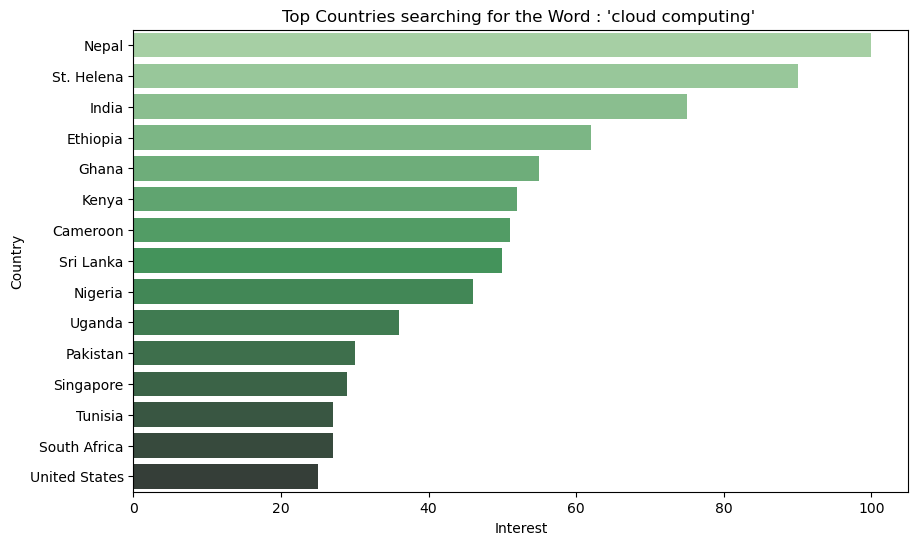

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Greens_d")
plt.title(f"Top Countries searching for the Word : '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show

# World-map with the scatter of searching keyword 

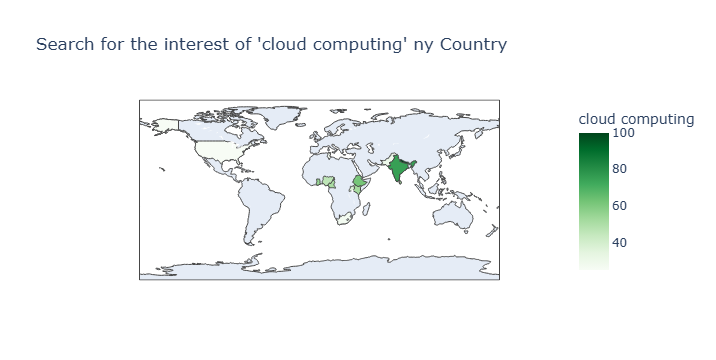

In [35]:
region_data.reset_index(drop=True, inplace=True)
fig = px.choropleth(region_data,
                   locations = 'geoName' ,
                    locationmode = 'country names' ,
                    color = keyword , 
                    title = f"Search for the interest of '{keyword}' ny Country",
                    color_continuous_scale = 'Greens')
fig.show()

# #Time-wise Interest

In [36]:
time_df = pytrends.interest_over_time()

C:\Anaconda\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



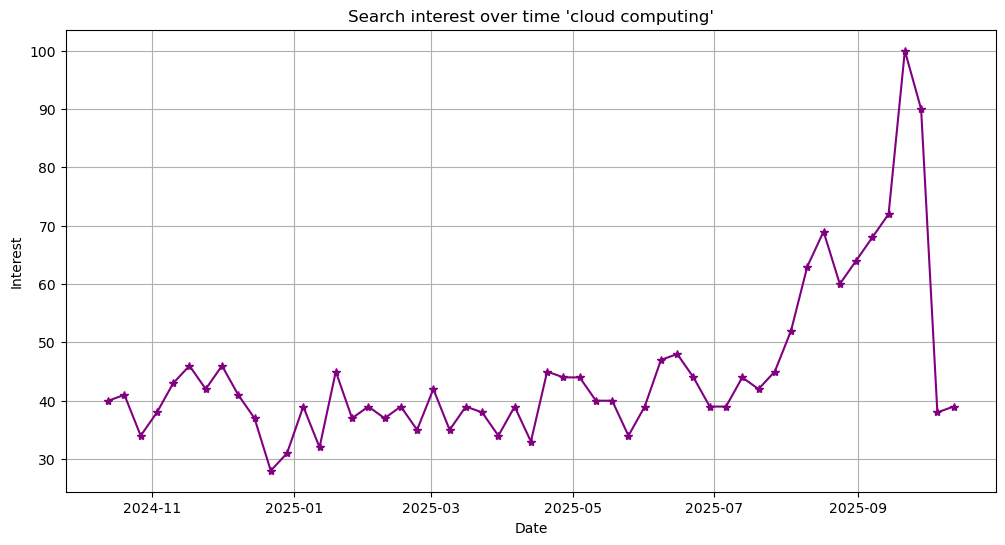

In [39]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword],marker = '*', color = 'purple' )
plt.title(f"Search interest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()


# #Multiple Key-words comparisions

In [40]:
kw_list=["Data Science","cloud computing" , "Machine Learning" , "Deep Learning" , "Google cloud"]
pytrends.build_payload(kw_list, cat = 0 , timeframe = 'today 12-m', geo = '',gprop='')

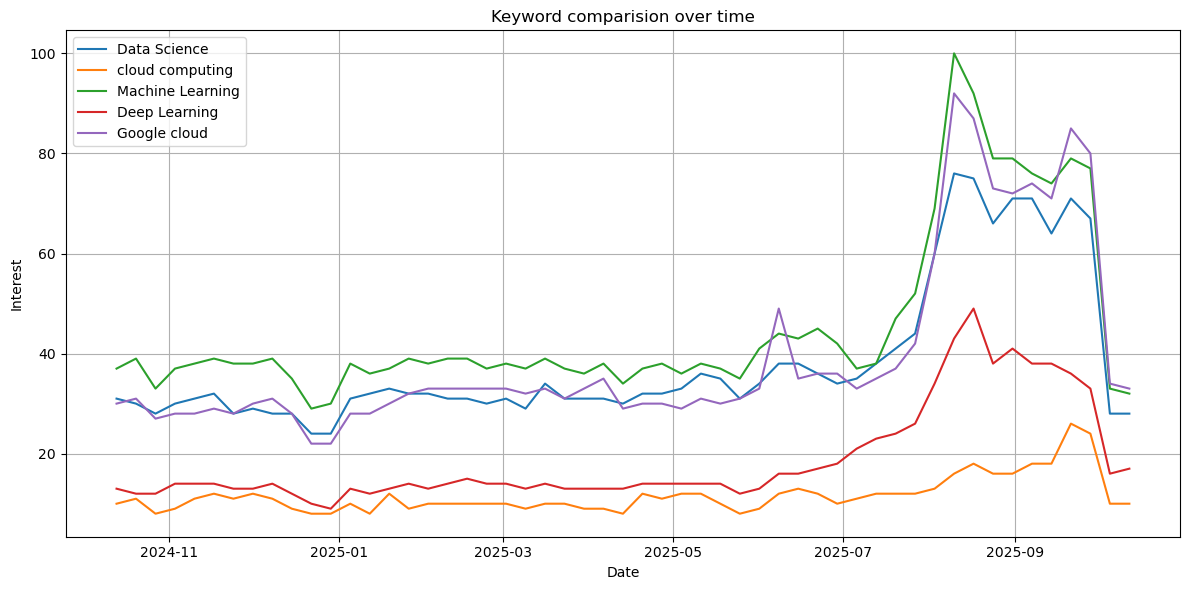

In [41]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize = (12,6))

for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)
    
plt.title("Keyword comparision over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()